# Assignment 3
Seth Siriya

In [2]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt
import random
import matplotlib.cm as cm
import matplotlib.patches as mpatches


In [3]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

In [39]:
# Load all data

# Parameters
directory = 'mnist'
IMG_HEIGHT = 28
IMG_WIDTH = 28

# get class labels and directory
class_folder = os.listdir(directory)
class_labs = [int(curr_folder[1:]) for curr_folder in class_folder]
class_size = {}

# get images from each class
all_imgs = {}

# loop through class folders
for counter, curr_class_folder in enumerate(class_folder):
    
    # obtain filepaths
    img_names = os.listdir(directory + '/' + curr_class_folder)
    filepaths = [directory + '/' + curr_class_folder + '/' + curr_img_name for curr_img_name in img_names]
    
    # determine number of images in class
    class_size[class_labs[counter]] = len(filepaths)
    
    # load all images into array for particular class
    curr_X = np.zeros((IMG_HEIGHT * IMG_WIDTH, class_size[class_labs[counter]]))
    for n in range(class_size[class_labs[counter]]):
        curr_X[:, n] = np.reshape(np.array(imageio.imread(filepaths[n])), (IMG_HEIGHT * IMG_WIDTH), 1)
    
    # append array for class to list for all classes
    all_imgs[class_labs[counter]] = curr_X

In [40]:
# Generate X containing random samples, as well as y (containing labels)

# Parameters
samps = 300 # number of samples for each class

# Loop through each class and generate single X containing random samples
X = np.zeros((IMG_HEIGHT * IMG_WIDTH, samps * len(class_labs)))
X_indxs = [i for i in range(300 * len(class_labs))]
random.shuffle(X_indxs)

y = np.zeros(samps*len(class_labs))

for labs in class_labs:
    for curr_samp in range(samps):
        class_indxs = [i for i in range(300)]
        random.shuffle(class_indxs)

        # set columns of X now
        X[:, X_indxs[labs*samps + curr_samp]] = all_imgs[labs][:, class_indxs[curr_samp]]
        
        # set corresponding y
        y[X_indxs[labs*samps + curr_samp]] = int(labs)

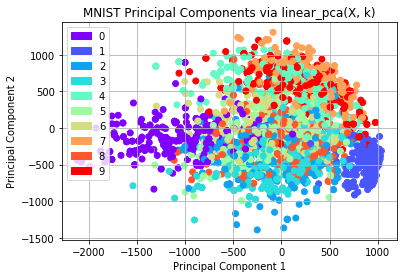

In [44]:
# Insert Code for Subtask 1.1 here

# Provide code that tests the function with selected images from the 
# provided MNIST training set by visualising the first 2 scores in 
# a scatter plot

def visualise_2d(x, y, labs, num_classes, title, xlabel, ylabel):
    
    # Generate scatter plot with colours according to label
    N = len(x)

    # Sample colors from spectrum to represent each class
    colors = cm.rainbow(np.linspace(0, 1, num_classes))

    C = np.zeros((N, 4))   # Color vector
    # set colors of each sample
    for n in range(N):
        C[n, :] = np.expand_dims(colors[int(labs[n])], axis = 0)

    # Plot the first 2 principal components of data
    plt.scatter(x, y, c=C)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('MNIST Principal Components via linear_pca(X, k)')
    legend_patch = [mpatches.Patch(color=colors[i], label=str(i)) for i in range(0, num_classes)]
    plt.legend(handles=legend_patch)
    plt.grid()
    plt.show()

# Plot the first 2 principal components of data
S_linear = linear_pca(X, 2)
visualise_2d(S_linear[0,:], S_linear[1,:], y, len(class_labs), 
             'MNIST Principal Components via linear_pca(X, k)', 
             'Principal Component 1', 
             'Principal Component 2')


In [45]:
def gram_pca(K, k):
    # Calculate centred gram matrix
    N = K.shape[1]
    H = np.identity(N) - 1.0 / N * np.ones((N, N))
    K_c = np.dot(H, np.dot(K, H))
    
    # Calculate Sigma_k and V_k_T
    [V, Sigma2_list, VT] = np.linalg.svd(K_c, full_matrices=False)
    Sigma_k = np.diag(np.sqrt(Sigma2_list))[:k, :k]
    VT_k = VT[:k, :]
    
    S = np.dot(Sigma_k, VT_k)
    
    return S

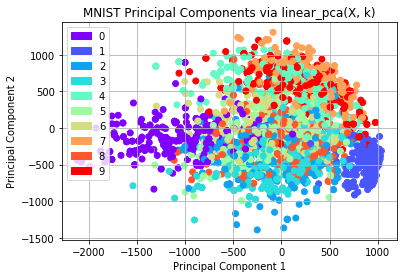

In [46]:
# Insert Code for Subtask 1.3 here
S_gram = gram_pca(np.dot(np.transpose(X), X), 2)
visualise_2d(S_gram[0,:], S_gram[1,:], y, len(class_labs), 
             'MNIST Principal Components via gram_pca(X, k)', 
             'Principal Component 1', 
             'Principal Component 2')

In [47]:
def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here
    
    def cappa(x, y, sigma):
        return np.exp(- (np.sum(np.square(x - y))) / (2 * sigma**2))
    N = X.shape[1]
    
    # Calculate gram matrix
    # Loop through upper triangle
    K = np.zeros((N, N))
    for col in range(0, N):
        for row in range(0, col+1):
            K[row, col] = cappa(X[:, row], X[:, col], sigma)
    
    # Set lower triangle same as upper triangle
    for col in range(0, N):
        for row in range(col+1, N):
            K[row, col] = K[col, row]

    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

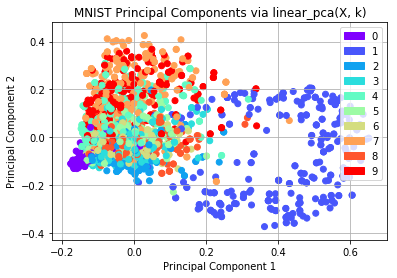

In [48]:
#Insert Code for Subtask 1.5 here
S_gauss = gaussian_kernel_pca(X, 2, 1000)
visualise_2d(S_gauss[0,:], S_gauss[1,:], y, len(class_labs), 
             'MNIST Principal Components via gram_pca(X, k)', 
             'Principal Component 1', 
             'Principal Component 2')